<a href="https://colab.research.google.com/github/Marcin19721205/WSBNeuronowe/blob/main/niezrownowazenie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

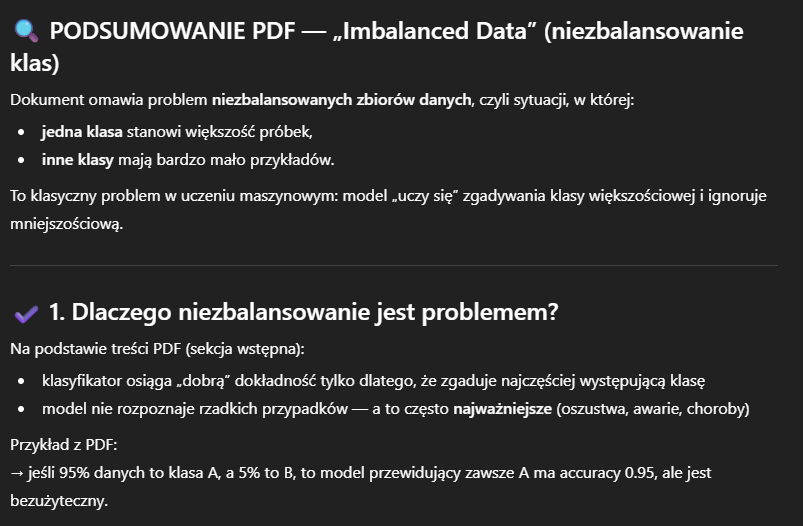

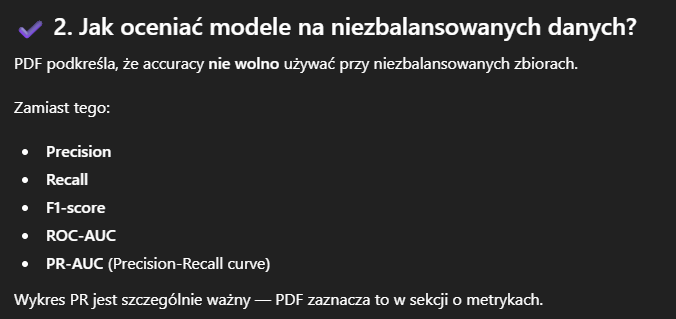

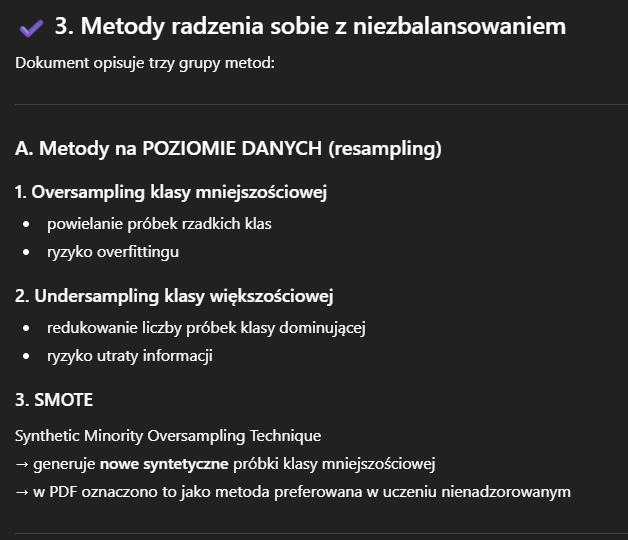

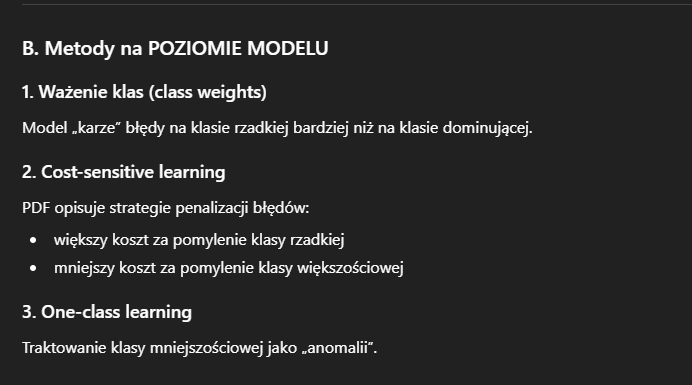

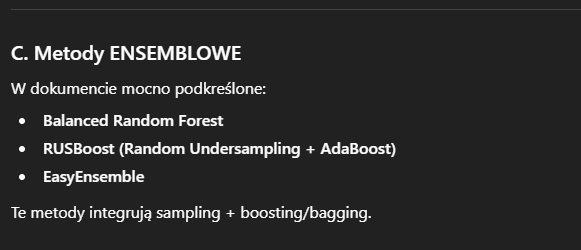

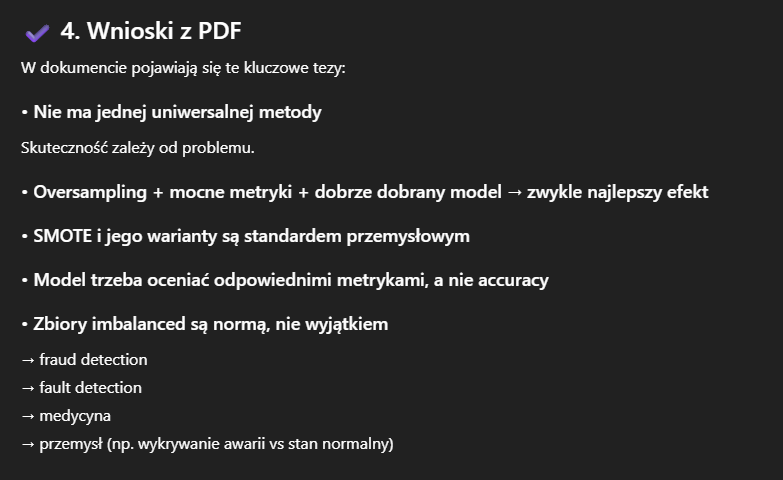

In [2]:
import pandas as pd  # biblioteka do pracy z danymi tabelarycznymi

# Wczytanie pliku z folderu sample_data
df = pd.read_csv('sample_data/NiezbalansowanieKlas.csv')  # wczytujemy CSV jako DataFrame

df.head()  # wyświetlamy pierwsze 5 wierszy, żeby sprawdzić zawartość


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,y
0,-0.148924,0.661296,-0.715433,-0.658576,-0.287318,1.759967,-0.291400,0.149455,-0.799881,1.920118,...,-0.013127,1.495742,-0.423784,0.418430,-0.252565,0.402606,-0.980498,-1.117957,0.574387,1
1,0.317515,1.059118,1.972616,-0.724051,-1.943244,1.554553,1.170784,1.555218,-1.738580,0.681346,...,0.918110,0.442833,0.753008,-0.615979,0.287863,4.221421,-0.596678,-0.002005,0.386227,0
2,-1.029505,0.608758,-0.039300,0.843907,0.615472,-0.830574,0.511069,0.223448,1.852141,-0.051253,...,-0.412110,-2.931124,0.803760,-1.103934,0.984544,-1.031608,-0.841369,-1.398327,0.937652,2
3,-1.880151,0.902936,-1.017802,-1.505484,-0.537162,0.155600,0.284464,1.473542,-1.354532,0.674899,...,-1.640098,-0.982468,-0.450585,-1.177508,2.013669,-0.843948,-0.335772,-0.710392,0.990769,0
4,1.481777,-2.239376,-1.413297,-1.623807,0.494429,0.273237,0.611129,0.426882,-3.068751,0.351677,...,0.250695,-0.009417,-2.175722,-0.531968,-0.174664,-0.077202,-0.201534,0.246537,-1.901438,0


#Podsumowanie

In [3]:
import pandas as pd   # biblioteka do pracy z tabelami

df = pd.read_csv('sample_data/NiezbalansowanieKlas.csv')  # wczytanie danych

y = df['y']  # kolumna target — klasy

# --- Podsumowanie ilości klas ---
unique_classes = y.unique()                     # lista unikalnych klas
n_classes = len(unique_classes)                 # liczba klas
counts = y.value_counts().sort_index()          # liczność każdej klasy
percent = y.value_counts(normalize=True).sort_index() * 100  # procentowy udział klas

# Wyświetlamy podsumowanie
print("Liczba klas:", n_classes)
print("\nLiczność każdej klasy:")
print(counts)

print("\nProcentowy udział klas:")
print(percent.round(2))


Liczba klas: 3

Liczność każdej klasy:
y
0    3490
1    1006
2     504
Name: count, dtype: int64

Procentowy udział klas:
y
0    69.80
1    20.12
2    10.08
Name: proportion, dtype: float64


#wczytanie, podział, standaryzacja dla całego zadania

In [4]:
import numpy as np                     # obliczenia numeryczne
import pandas as pd                    # praca z danymi tabelarycznymi
from sklearn.model_selection import train_test_split   # podział na zbiory
from sklearn.preprocessing import StandardScaler      # standaryzacja cech

# --- podział na X (cechy) i y (target) ---
X = df.drop(columns=['y']).values      # wszystkie kolumny oprócz 'y' jako macierz cech
y = df['y'].values                     # kolumna 'y' jako wektor etykiet klas

# --- podział na train/val/test z zachowaniem proporcji klas (stratyfikacja) ---
X_trainval, X_test, y_trainval, y_test = train_test_split(  # najpierw wydzielamy zbiór testowy
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(         # potem dzielimy train na train i val
    X_trainval, y_trainval, test_size=0.2,
    random_state=42, stratify=y_trainval
)

# --- standaryzacja: scaler uczony tylko na zbiorze treningowym ---
scaler_global = StandardScaler()       # obiekt standaryzatora używany we wszystkich modelach
scaler_global.fit(X_train)             # uczymy scaler na danych treningowych

X_train_std = scaler_global.transform(X_train)   # standaryzujemy zbiór treningowy
X_val_std   = scaler_global.transform(X_val)     # standaryzujemy zbiór walidacyjny
X_test_std  = scaler_global.transform(X_test)    # standaryzujemy zbiór testowy

# szybka kontrola wymiarów
print(X_train_std.shape, X_val_std.shape, X_test_std.shape)  # liczba próbek i cech w zbiorach


(3200, 20) (800, 20) (1000, 20)


#model sieci neuronowej (3 warstwy: 64 → 32 → 3)

In [5]:
import tensorflow as tf                            # główna biblioteka ML
from tensorflow.keras import layers, models        # warstwy i modele Keras

# --- parametry modelu ---
INPUT_DIM = X_train_std.shape[1]                   # liczba cech wejściowych
N_CLASSES = len(np.unique(y))                      # liczba klas (powinno być 3)
EPOCHS_NN_V1 = 50                                  # liczba epok uczenia
BATCH_SIZE_NN_V1 = 64                              # rozmiar batcha

# --- budowa modelu ---
model_nn_v1 = models.Sequential()                  # inicjalizujemy model sekwencyjny
model_nn_v1.add(layers.Input(shape=(INPUT_DIM,)))  # warstwa wejściowa (wektor cech)
model_nn_v1.add(layers.Dense(64, activation='relu', name='dense_64'))  # 1. warstwa ukryta 64 neurony
model_nn_v1.add(layers.Dense(32, activation='relu', name='dense_32'))  # 2. warstwa ukryta 32 neurony
model_nn_v1.add(layers.Dense(N_CLASSES, activation='softmax', name='output_softmax'))  # warstwa wyjściowa

# --- kompilacja modelu ---
model_nn_v1.compile(
    optimizer='adam',                               # optymalizator Adam
    loss='sparse_categorical_crossentropy',         # funkcja kosztu dla y jako etykiet 0..K-1
    metrics=['accuracy']                            # metryka: accuracy
)

# --- trening z walidacją ---
history_nn_v1 = model_nn_v1.fit(
    X_train_std, y_train,                           # dane treningowe
    validation_data=(X_val_std, y_val),             # dane walidacyjne
    epochs=EPOCHS_NN_V1,                            # liczba epok
    batch_size=BATCH_SIZE_NN_V1,                    # rozmiar batcha
    verbose=1                                       # poziom logów treningu
)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6342 - loss: 0.8891 - val_accuracy: 0.7100 - val_loss: 0.7427
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7299 - loss: 0.7131 - val_accuracy: 0.7425 - val_loss: 0.6617
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7592 - loss: 0.6353 - val_accuracy: 0.7812 - val_loss: 0.6030
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7939 - loss: 0.5737 - val_accuracy: 0.7912 - val_loss: 0.5669
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8033 - loss: 0.5301 - val_accuracy: 0.8138 - val_loss: 0.5366
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8046 - loss: 0.5026 - val_accuracy: 0.8125 - val_loss: 0.5168
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8192 - loss: 0.4738 - val_accuracy: 0.8213 - val_loss: 0.4990
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8266 - loss: 0.4604 - val_accuracy: 0.8300 - val_loss:

#wykresy accuracy i loss dla modelu

    accuracy      loss  val_accuracy  val_loss
45  0.953750  0.158126       0.84625  0.449010
46  0.951875  0.156101       0.84125  0.456064
47  0.958438  0.152582       0.84250  0.471413
48  0.953125  0.149589       0.84750  0.466780
49  0.954687  0.147085       0.85000  0.460111


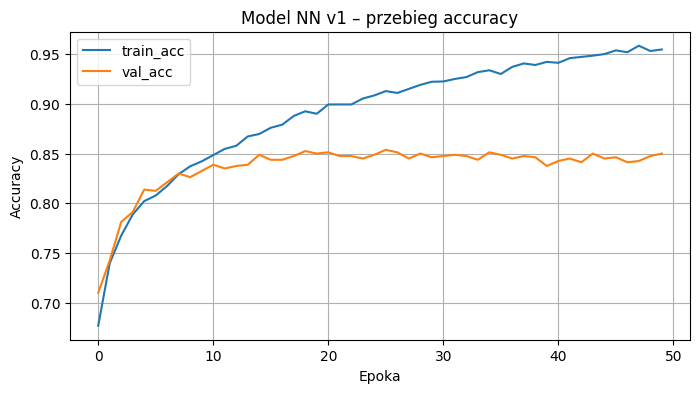

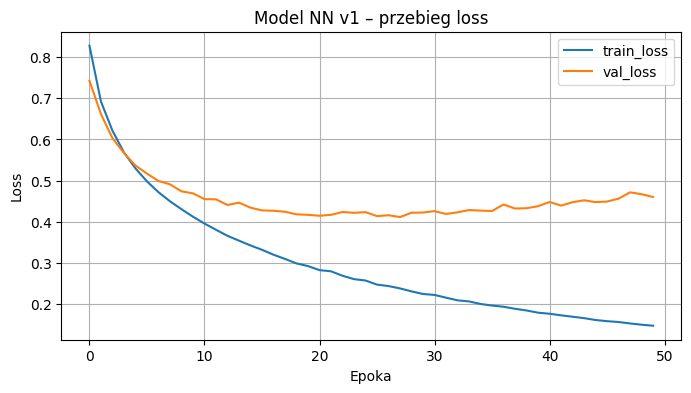

In [6]:
import matplotlib.pyplot as plt          # biblioteka do wykresów
import pandas as pd                      # przyda się do wygodniejszej pracy z history

# --- konwersja historii do DataFrame ---
history_df_nn_v1 = pd.DataFrame(history_nn_v1.history)   # zapisujemy przebieg uczenia w DataFrame
print(history_df_nn_v1.tail())                           # podgląd ostatnich epok

# --- wykres accuracy ---
plt.figure(figsize=(8, 4))                               # ustawiamy rozmiar rysunku
plt.plot(history_df_nn_v1['accuracy'], label='train_acc')       # accuracy na zbiorze treningowym
plt.plot(history_df_nn_v1['val_accuracy'], label='val_acc')     # accuracy na zbiorze walidacyjnym
plt.xlabel('Epoka')                                      # opis osi X
plt.ylabel('Accuracy')                                   # opis osi Y
plt.title('Model NN v1 – przebieg accuracy')            # tytuł wykresu
plt.legend()                                             # legenda
plt.grid(True)                                           # siatka pomocnicza
plt.show()                                               # wyświetlenie wykresu

# --- wykres loss ---
plt.figure(figsize=(8, 4))                               # nowy rysunek
plt.plot(history_df_nn_v1['loss'], label='train_loss')          # strata na treningu
plt.plot(history_df_nn_v1['val_loss'], label='val_loss')        # strata na walidacji
plt.xlabel('Epoka')                                      # opis osi X
plt.ylabel('Loss')                                       # opis osi Y
plt.title('Model NN v1 – przebieg loss')                # tytuł wykresu
plt.legend()                                             # legenda
plt.grid(True)                                           # siatka
plt.show()                                               # pokazanie wykresu


#podsumowanie na danych testowych dla wszystkich klas

In [7]:
from sklearn.metrics import classification_report, confusion_matrix   # metryki klasyfikacji

# --- ocena modelu na zbiorze testowym ---
test_loss_nn_v1, test_acc_nn_v1 = model_nn_v1.evaluate(
    X_test_std, y_test, verbose=0              # ocena bez logów
)

print(f"Test loss (NN v1): {test_loss_nn_v1:.4f}")      # wypisujemy stratę na teście
print(f"Test accuracy (NN v1): {test_acc_nn_v1:.4f}")   # wypisujemy accuracy na teście

# --- predykcje na zbiorze testowym ---
y_test_proba_nn_v1 = model_nn_v1.predict(X_test_std)    # przewidywane prawdopodobieństwa klas
y_test_pred_nn_v1 = np.argmax(y_test_proba_nn_v1, axis=1)  # wybieramy klasę z max prawdopodobieństwem

# --- raport dla wszystkich klas ---
print("\nClassification report – NN v1 (dla wszystkich klas):")
print(classification_report(y_test, y_test_pred_nn_v1))  # precision/recall/F1 dla każdej klasy

# --- macierz pomyłek ---
cm_nn_v1 = confusion_matrix(y_test, y_test_pred_nn_v1)   # liczymy macierz konfuzji
print("Confusion matrix – NN v1:")
print(cm_nn_v1)                                          # wypisujemy macierz pomyłek


Test loss (NN v1): 0.4382
Test accuracy (NN v1): 0.8620
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Classification report – NN v1 (dla wszystkich klas):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       698
           1       0.80      0.71      0.75       201
           2       0.75      0.53      0.62       101

    accuracy                           0.86      1000
   macro avg       0.81      0.73      0.77      1000
weighted avg       0.86      0.86      0.86      1000

Confusion matrix – NN v1:
[[665  26   7]
 [ 47 143  11]
 [ 37  10  54]]


In [8]:
import plotly.express as px        # plotly do rysowania heatmap
import pandas as pd                # DataFrame do wygodnego formatowania

# --- tworzymy DataFrame z confusion matrix ---
cm_df_nn_v1 = pd.DataFrame(
    cm_nn_v1,                      # macierz pomyłek policzona wcześniej
    index=[f"Actual {c}" for c in np.unique(y_test)],     # etykiety wierszy
    columns=[f"Pred {c}" for c in np.unique(y_test)]      # etykiety kolumn
)

# --- rysujemy heatmapę ---
fig_cm_nn_v1 = px.imshow(
    cm_df_nn_v1,                    # dane
    text_auto=True,                 # automatyczne wyświetlanie wartości w komórkach
    color_continuous_scale="Blues", # ładna niebieska skala
    title="Confusion Matrix – Model NN v1 (Plotly)"  # tytuł
)

# ustawienia estetyczne
fig_cm_nn_v1.update_layout(
    xaxis_title="Predykcja modelu",   # podpis osi X
    yaxis_title="Rzeczywista klasa",  # podpis osi Y
    font=dict(size=14)                # większa czcionka
)

fig_cm_nn_v1.show()                   # wyświetlamy interaktywny wykres


#Oversampling klasy mniejszościowej (tylko train!)

In [10]:
from collections import Counter                         # do podsumowania klas
from imblearn.over_sampling import RandomOverSampler   # oversampling klas mniejszościowych

# --- sprawdzenie oryginalnego rozkładu klas w zbiorze treningowym ---
print("Rozkład klas przed oversamplingiem:", Counter(y_train))  # liczność klas w train

# --- konfiguracja oversamplera ---
ros = RandomOverSampler(random_state=42)               # obiekt oversamplera (losowe powielanie próbek)

# --- oversampling TYLKO na zbiorze treningowym (dane już wystandaryzowane) ---
X_train_std_os, y_train_os = ros.fit_resample(X_train_std, y_train)  # tworzymy zbalansowany zbiór train

# --- sprawdzenie nowego rozkładu klas ---
print("Rozkład klas po oversamplingu:", Counter(y_train_os))   # liczność klas po oversamplingu
print("Kształt X_train_std_os:", X_train_std_os.shape)         # rozmiar nowego zbioru treningowego


Rozkład klas przed oversamplingiem: Counter({np.int64(0): 2234, np.int64(1): 644, np.int64(2): 322})
Rozkład klas po oversamplingu: Counter({np.int64(1): 2234, np.int64(0): 2234, np.int64(2): 2234})
Kształt X_train_std_os: (6702, 20)


#Nowy model NN trenowany na oversamplowanych danych

In [11]:
import tensorflow as tf                            # biblioteka ML
from tensorflow.keras import layers, models        # warstwy i modele Keras

# --- parametry modelu oversamplingowego ---
INPUT_DIM = X_train_std_os.shape[1]                # liczba cech wejściowych (powinna być taka sama)
N_CLASSES = len(np.unique(y_train_os))             # liczba klas (3)
EPOCHS_NN_OS_V1 = 50                               # liczba epok (taka jak w modelu bazowym)
BATCH_SIZE_NN_OS_V1 = 64                           # rozmiar batcha

# --- budowa modelu ---
model_nn_os_v1 = models.Sequential()                        # inicjalizacja modelu sekwencyjnego
model_nn_os_v1.add(layers.Input(shape=(INPUT_DIM,)))        # warstwa wejściowa
model_nn_os_v1.add(layers.Dense(64, activation='relu', name='dense_64_os'))   # 1. warstwa ukryta
model_nn_os_v1.add(layers.Dense(32, activation='relu', name='dense_32_os'))   # 2. warstwa ukryta
model_nn_os_v1.add(layers.Dense(N_CLASSES, activation='softmax', name='output_softmax_os'))  # wyjście

# --- kompilacja modelu ---
model_nn_os_v1.compile(
    optimizer='adam',                               # optymalizator Adam
    loss='sparse_categorical_crossentropy',         # funkcja kosztu dla etykiet 0..K-1
    metrics=['accuracy']                            # accuracy – do podglądu uczenia
)

# --- trening modelu na oversamplowanych danych ---
history_nn_os_v1 = model_nn_os_v1.fit(
    X_train_std_os, y_train_os,                     # zbiór treningowy po oversamplingu
    validation_data=(X_val_std, y_val),             # walidacja na oryginalnym zbiorze walidacyjnym
    epochs=EPOCHS_NN_OS_V1,                         # liczba epok
    batch_size=BATCH_SIZE_NN_OS_V1,                 # rozmiar batcha
    verbose=1                                       # logowanie przebiegu
)


Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4491 - loss: 1.0498 - val_accuracy: 0.6263 - val_loss: 0.9011
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6503 - loss: 0.8274 - val_accuracy: 0.7025 - val_loss: 0.7438
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7156 - loss: 0.7001 - val_accuracy: 0.7225 - val_loss: 0.6827
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7602 - loss: 0.5880 - val_accuracy: 0.7588 - val_loss: 0.5961
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8125 - loss: 0.4994 - val_accuracy: 0.7775 - val_loss: 0.5479
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8454 - loss: 0.4325 - val_accuracy: 0.7975 - val_loss: 0.5265
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8623 - loss: 0.4053 - val_accuracy: 0.7675 - val_loss: 0.5430
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8847 - loss: 0.3470 - val_accuracy: 0.

#Wykresy accuracy i loss (model NN + oversampling)

    accuracy      loss  val_accuracy  val_loss
45  0.993435  0.038786       0.81375  0.809279
46  0.994778  0.035248       0.81375  0.810485
47  0.994778  0.033940       0.81500  0.831241
48  0.995971  0.031196       0.81750  0.845067
49  0.996717  0.028916       0.81750  0.872689


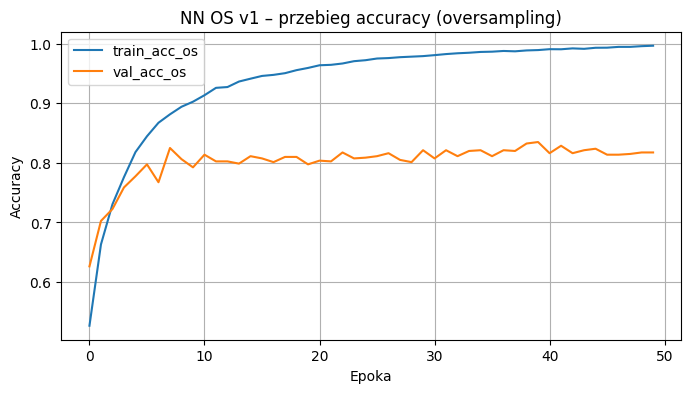

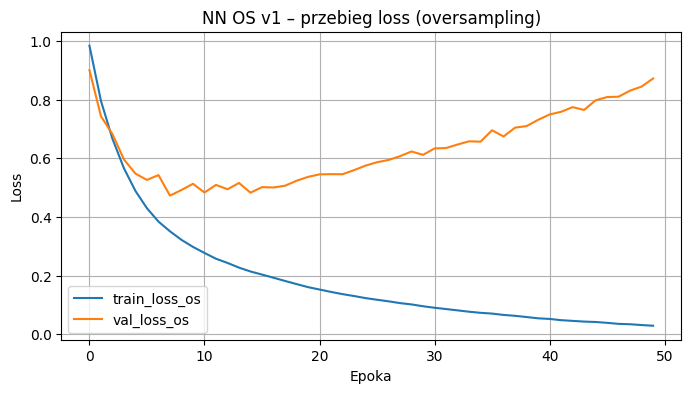

In [12]:
import matplotlib.pyplot as plt             # rysowanie wykresów
import pandas as pd                         # konwersja historii na DataFrame

# --- historia treningu do DataFrame ---
history_df_nn_os_v1 = pd.DataFrame(history_nn_os_v1.history)  # konwersja historii na tabelę
print(history_df_nn_os_v1.tail())                             # podgląd ostatnich epok

# --- wykres accuracy ---
plt.figure(figsize=(8, 4))                                         # rozmiar wykresu
plt.plot(history_df_nn_os_v1['accuracy'], label='train_acc_os')    # accuracy train
plt.plot(history_df_nn_os_v1['val_accuracy'], label='val_acc_os')  # accuracy val
plt.xlabel('Epoka')                                                # opis osi X
plt.ylabel('Accuracy')                                             # opis osi Y
plt.title('NN OS v1 – przebieg accuracy (oversampling)')           # tytuł wykresu
plt.legend()                                                       # legenda
plt.grid(True)                                                     # siatka
plt.show()                                                         # wyświetlenie wykresu

# --- wykres loss ---
plt.figure(figsize=(8, 4))                                         # nowy wykres
plt.plot(history_df_nn_os_v1['loss'], label='train_loss_os')       # loss train
plt.plot(history_df_nn_os_v1['val_loss'], label='val_loss_os')     # loss val
plt.xlabel('Epoka')                                                # opis osi X
plt.ylabel('Loss')                                                 # opis osi Y
plt.title('NN OS v1 – przebieg loss (oversampling)')               # tytuł wykresu
plt.legend()                                                       # legenda
plt.grid(True)                                                     # siatka
plt.show()                                                         # wyświetlenie


#Podsumowanie na teście + confusion matrix + Plotly

In [13]:
from sklearn.metrics import classification_report, confusion_matrix   # metryki klasyfikacji

# --- ocena na zbiorze testowym ---
test_loss_nn_os_v1, test_acc_nn_os_v1 = model_nn_os_v1.evaluate(
    X_test_std, y_test, verbose=0                      # oceniamy na oryginalnym zbiorze testowym
)

print(f"Test loss (NN OS v1): {test_loss_nn_os_v1:.4f}")    # wypisujemy stratę
print(f"Test accuracy (NN OS v1): {test_acc_nn_os_v1:.4f}") # wypisujemy accuracy (pomocniczo)

# --- predykcje na zbiorze testowym ---
y_test_proba_nn_os_v1 = model_nn_os_v1.predict(X_test_std)         # prawdopodobieństwa klas
y_test_pred_nn_os_v1 = np.argmax(y_test_proba_nn_os_v1, axis=1)    # klasy z max prawdopodobieństwem

# --- raport jakości dla wszystkich klas ---
print("\nClassification report – NN OS v1 (oversampling):")
print(classification_report(y_test, y_test_pred_nn_os_v1))          # precision/recall/F1 dla każdej klasy

# --- macierz pomyłek (liczby) ---
cm_nn_os_v1 = confusion_matrix(y_test, y_test_pred_nn_os_v1)        # macierz konfuzji
print("Confusion matrix – NN OS v1:")
print(cm_nn_os_v1)                                                  # wypisujemy macierz


Test loss (NN OS v1): 0.8355
Test accuracy (NN OS v1): 0.8200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification report – NN OS v1 (oversampling):
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       698
           1       0.70      0.71      0.70       201
           2       0.55      0.51      0.53       101

    accuracy                           0.82      1000
   macro avg       0.72      0.71      0.71      1000
weighted avg       0.82      0.82      0.82      1000

Confusion matrix – NN OS v1:
[[626  43  29]
 [ 46 142  13]
 [ 32  17  52]]


In [14]:
import plotly.express as px        # interaktywny wykres
import pandas as pd                # DataFrame dla czytelności

# --- DataFrame z confusion matrix ---
cm_df_nn_os_v1 = pd.DataFrame(
    cm_nn_os_v1,                                          # surowa macierz
    index=[f"Actual {c}" for c in np.unique(y_test)],     # etykiety wierszy
    columns=[f"Pred {c}" for c in np.unique(y_test)]      # etykiety kolumn
)

# --- heatmapa w Plotly ---
fig_cm_nn_os_v1 = px.imshow(
    cm_df_nn_os_v1,                      # dane do wizualizacji
    text_auto=True,                      # wartości w komórkach
    color_continuous_scale="Blues",      # skala kolorów
    title="Confusion Matrix – NN OS v1 (oversampling, Plotly)"  # tytuł wykresu
)

fig_cm_nn_os_v1.update_layout(
    xaxis_title="Predykcja modelu",      # podpis osi X
    yaxis_title="Rzeczywista klasa",     # podpis osi Y
    font=dict(size=14)                   # większa czcionka
)

fig_cm_nn_os_v1.show()                   # wyświetlenie interaktywnej macierzy


#Undersampling klasy większościowej (tylko train)

In [15]:
from collections import Counter                           # importujemy licznik do podsumowania klas
from imblearn.under_sampling import RandomUnderSampler    # importujemy undersampler losowy

print("Rozkład klas przed undersamplingiem:", Counter(y_train))  # wypisujemy rozkład klas w zbiorze train

rus = RandomUnderSampler(random_state=42)                 # tworzymy obiekt undersamplera z ustalonym seedem

X_train_std_us, y_train_us = rus.fit_resample(            # wykonujemy undersampling na danych treningowych
    X_train_std,                                          # wejście: wystandaryzowane cechy zbioru train
    y_train                                               # etykiety klas zbioru train
)

print("Rozkład klas po undersamplingu:", Counter(y_train_us))    # wypisujemy nowy rozkład klas
print("Kształt X_train_std_us:", X_train_std_us.shape)           # sprawdzamy rozmiar nowego zbioru train


Rozkład klas przed undersamplingiem: Counter({np.int64(0): 2234, np.int64(1): 644, np.int64(2): 322})
Rozkład klas po undersamplingu: Counter({np.int64(0): 322, np.int64(1): 322, np.int64(2): 322})
Kształt X_train_std_us: (966, 20)


Model NN trenowany na danych po undersamplingu

In [16]:
import tensorflow as tf                                   # główna biblioteka ML
from tensorflow.keras import layers, models               # warstwy i modele z Keras

INPUT_DIM_US = X_train_std_us.shape[1]                    # liczba cech wejściowych dla modelu US
N_CLASSES_US = len(np.unique(y_train_us))                 # liczba klas (powinna być 3)
EPOCHS_NN_US_V1 = 50                                      # liczba epok uczenia dla modelu US
BATCH_SIZE_NN_US_V1 = 64                                  # rozmiar batcha dla modelu US

model_nn_us_v1 = models.Sequential()                      # inicjalizujemy model sekwencyjny
model_nn_us_v1.add(layers.Input(shape=(INPUT_DIM_US,)))   # dodajemy wejście o wymiarze liczby cech
model_nn_us_v1.add(layers.Dense(64, activation='relu', name='dense_64_us'))   # 1. warstwa ukryta (64 neurony)
model_nn_us_v1.add(layers.Dense(32, activation='relu', name='dense_32_us'))   # 2. warstwa ukryta (32 neurony)
model_nn_us_v1.add(layers.Dense(N_CLASSES_US, activation='softmax', name='output_softmax_us'))  # warstwa wyjściowa

model_nn_us_v1.compile(                                   # kompilujemy model
    optimizer='adam',                                     # optymalizator Adam
    loss='sparse_categorical_crossentropy',               # funkcja straty dla etykiet 0..K-1
    metrics=['accuracy']                                  # metryka accuracy (pomocniczo)
)

history_nn_us_v1 = model_nn_us_v1.fit(                    # trenujemy model na zbiorze po undersamplingu
    X_train_std_us,                                       # cechy po undersamplingu
    y_train_us,                                           # etykiety po undersamplingu
    validation_data=(X_val_std, y_val),                   # walidacja na oryginalnym zbiorze walidacyjnym
    epochs=EPOCHS_NN_US_V1,                               # liczba epok
    batch_size=BATCH_SIZE_NN_US_V1,                       # rozmiar batcha
    verbose=1                                             # poziom logowania treningu
)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.3587 - loss: 1.1419 - val_accuracy: 0.3587 - val_loss: 1.0958
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.4451 - loss: 1.0509 - val_accuracy: 0.5425 - val_loss: 0.9901
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5598 - loss: 0.9935 - val_accuracy: 0.5275 - val_loss: 0.9880
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5617 - loss: 0.9603 - val_accuracy: 0.5113 - val_loss: 0.9867
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6147 - loss: 0.9041 - val_accuracy: 0.5738 - val_loss: 0.9328
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6299 - loss: 0.8812 - val_accuracy: 0.5913 - val_loss: 0.9147
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6576 - loss: 0.8355 - val_accuracy: 0.6263 - val_loss: 0.8825
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6659 - loss: 0.7987 - val_accuracy: 0.6500 - v

Wykresy accuracy i loss dla modelu NN US v1

    accuracy      loss  val_accuracy  val_loss
45  0.898551  0.330040       0.71875  0.680782
46  0.897516  0.324079       0.72250  0.681492
47  0.899586  0.319875       0.72375  0.676681
48  0.903727  0.311218       0.71750  0.699749
49  0.899586  0.304745       0.72375  0.674671


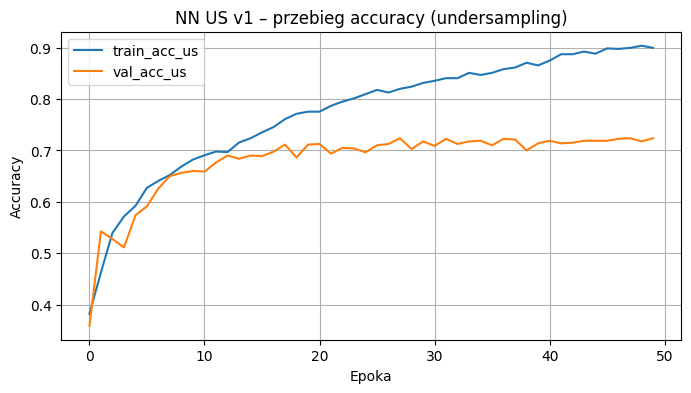

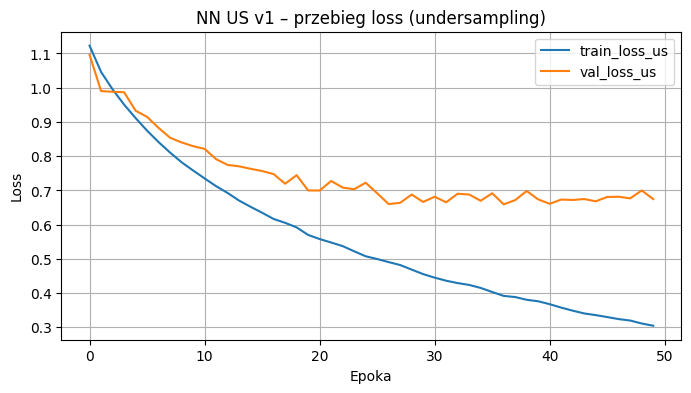

In [17]:
import matplotlib.pyplot as plt                           # biblioteka do rysowania wykresów
import pandas as pd                                       # biblioteka do pracy z tabelami

history_df_nn_us_v1 = pd.DataFrame(history_nn_us_v1.history)   # zamieniamy historię treningu na DataFrame
print(history_df_nn_us_v1.tail())                              # podglądamy ostatnie epoki

plt.figure(figsize=(8, 4))                                     # tworzymy pierwszy wykres (accuracy)
plt.plot(history_df_nn_us_v1['accuracy'], label='train_acc_us')    # accuracy na zbiorze treningowym
plt.plot(history_df_nn_us_v1['val_accuracy'], label='val_acc_us')  # accuracy na zbiorze walidacyjnym
plt.xlabel('Epoka')                                             # opis osi X
plt.ylabel('Accuracy')                                          # opis osi Y
plt.title('NN US v1 – przebieg accuracy (undersampling)')       # tytuł wykresu
plt.legend()                                                    # legenda
plt.grid(True)                                                  # siatka pomocnicza
plt.show()                                                      # wyświetlamy wykres

plt.figure(figsize=(8, 4))                                     # drugi wykres (loss)
plt.plot(history_df_nn_us_v1['loss'], label='train_loss_us')    # strata na treningu
plt.plot(history_df_nn_us_v1['val_loss'], label='val_loss_us')  # strata na walidacji
plt.xlabel('Epoka')                                             # opis osi X
plt.ylabel('Loss')                                              # opis osi Y
plt.title('NN US v1 – przebieg loss (undersampling)')           # tytuł wykresu
plt.legend()                                                    # legenda
plt.grid(True)                                                  # siatka
plt.show()                                                      # wyświetlamy wykres


Podsumowanie na teście + confusion matrix + Plotly

In [18]:
from sklearn.metrics import classification_report, confusion_matrix   # metryki klasyfikacji

test_loss_nn_us_v1, test_acc_nn_us_v1 = model_nn_us_v1.evaluate(     # oceniamy model na zbiorze testowym
    X_test_std,                                                      # cechy zbioru testowego
    y_test,                                                          # etykiety zbioru testowego
    verbose=0                                                        # brak dodatkowych logów
)

print(f"Test loss (NN US v1): {test_loss_nn_us_v1:.4f}")             # wypisujemy stratę na teście
print(f"Test accuracy (NN US v1): {test_acc_nn_us_v1:.4f}")          # wypisujemy accuracy na teście (pomocniczo)

y_test_proba_nn_us_v1 = model_nn_us_v1.predict(X_test_std)          # liczymy prawdopodobieństwa klas na teście
y_test_pred_nn_us_v1 = np.argmax(y_test_proba_nn_us_v1, axis=1)     # wybieramy klasę z największym prawdopodobieństwem

print("\nClassification report – NN US v1 (undersampling):")        # nagłówek raportu
print(classification_report(y_test, y_test_pred_nn_us_v1))          # drukujemy precision/recall/F1 dla klas

cm_nn_us_v1 = confusion_matrix(y_test, y_test_pred_nn_us_v1)        # liczymy macierz konfuzji
print("Confusion matrix – NN US v1:")                               # nagłówek macierzy
print(cm_nn_us_v1)                                                  # wypisujemy macierz


Test loss (NN US v1): 0.6820
Test accuracy (NN US v1): 0.7410
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification report – NN US v1 (undersampling):
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       698
           1       0.59      0.70      0.64       201
           2       0.40      0.67      0.50       101

    accuracy                           0.74      1000
   macro avg       0.63      0.71      0.65      1000
weighted avg       0.79      0.74      0.76      1000

Confusion matrix – NN US v1:
[[533  85  80]
 [ 38 140  23]
 [ 19  14  68]]


Plotly – ładny confusion matrix dla modelu z undersamplingiem

In [19]:
import plotly.express as px                                        # biblioteka do interaktywnych wykresów
import pandas as pd                                                # DataFrame dla macierzy

cm_df_nn_us_v1 = pd.DataFrame(                                     # tworzymy DataFrame z macierzy konfuzji
    cm_nn_us_v1,                                                   # surowa macierz
    index=[f"Actual {c}" for c in np.unique(y_test)],              # etykiety wierszy – klasy rzeczywiste
    columns=[f"Pred {c}" for c in np.unique(y_test)]               # etykiety kolumn – klasy przewidziane
)

fig_cm_nn_us_v1 = px.imshow(                                       # tworzymy heatmapę w Plotly
    cm_df_nn_us_v1,                                                # dane wejściowe
    text_auto=True,                                                # pokazujemy wartości w komórkach
    color_continuous_scale="Blues",                                # skala kolorów „Blues”
    title="Confusion Matrix – NN US v1 (undersampling, Plotly)"    # tytuł wykresu
)

fig_cm_nn_us_v1.update_layout(                                     # dopracowujemy layout
    xaxis_title="Predykcja modelu",                                # podpis osi X
    yaxis_title="Rzeczywista klasa",                               # podpis osi Y
    font=dict(size=14)                                             # ustawiamy większą czcionkę
)

fig_cm_nn_us_v1.show()                                             # wyświetlamy interaktywny wykres


#SMOTE na zbiorze treningowym

In [20]:
from collections import Counter                      # do policzenia klas
from imblearn.over_sampling import SMOTE             # importujemy SMOTE

print("Rozkład klas przed SMOTE:", Counter(y_train)) # wypisujemy rozkład klas w zbiorze train

smote = SMOTE(random_state=42)                       # tworzymy obiekt SMOTE z ustalonym seedem

X_train_std_smote, y_train_smote = smote.fit_resample(  # stosujemy SMOTE na danych treningowych
    X_train_std,                                      # wejście: wystandaryzowane cechy zbioru train
    y_train                                           # etykiety zbioru train
)

print("Rozkład klas po SMOTE:", Counter(y_train_smote)) # sprawdzamy nowy rozkład klas po SMOTE
print("Kształt X_train_std_smote:", X_train_std_smote.shape)  # rozmiar nowego zbioru train po SMOTE


Rozkład klas przed SMOTE: Counter({np.int64(0): 2234, np.int64(1): 644, np.int64(2): 322})
Rozkład klas po SMOTE: Counter({np.int64(1): 2234, np.int64(0): 2234, np.int64(2): 2234})
Kształt X_train_std_smote: (6702, 20)


In [21]:
import tensorflow as tf                                   # główna biblioteka ML
from tensorflow.keras import layers, models               # warstwy i modele Keras

INPUT_DIM_SMOTE = X_train_std_smote.shape[1]              # liczba cech wejściowych
N_CLASSES_SMOTE = len(np.unique(y_train_smote))           # liczba klas (powinna być 3)
EPOCHS_NN_SMOTE_V1 = 50                                   # liczba epok (jak w poprzednich modelach)
BATCH_SIZE_NN_SMOTE_V1 = 64                               # rozmiar batcha

model_nn_smote_v1 = models.Sequential()                   # inicjalizujemy model sekwencyjny
model_nn_smote_v1.add(layers.Input(shape=(INPUT_DIM_SMOTE,)))  # warstwa wejściowa
model_nn_smote_v1.add(layers.Dense(64, activation='relu', name='dense_64_smote'))  # 1. warstwa ukryta
model_nn_smote_v1.add(layers.Dense(32, activation='relu', name='dense_32_smote'))  # 2. warstwa ukryta
model_nn_smote_v1.add(layers.Dense(N_CLASSES_SMOTE, activation='softmax', name='output_softmax_smote'))  # wyjście

model_nn_smote_v1.compile(                                # kompilujemy model
    optimizer='adam',                                     # optymalizator Adam
    loss='sparse_categorical_crossentropy',               # funkcja straty dla etykiet 0..K-1
    metrics=['accuracy']                                  # accuracy – metryka pomocnicza
)

history_nn_smote_v1 = model_nn_smote_v1.fit(              # trenujemy model na danych po SMOTE
    X_train_std_smote,                                    # cechy po SMOTE
    y_train_smote,                                        # etykiety po SMOTE
    validation_data=(X_val_std, y_val),                   # walidacja na oryginalnym zbiorze walidacyjnym
    epochs=EPOCHS_NN_SMOTE_V1,                            # liczba epok
    batch_size=BATCH_SIZE_NN_SMOTE_V1,                    # rozmiar batcha
    verbose=1                                             # poziom logowania
)


Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4544 - loss: 1.0527 - val_accuracy: 0.6550 - val_loss: 0.8429
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6834 - loss: 0.7688 - val_accuracy: 0.7475 - val_loss: 0.6866
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7564 - loss: 0.6088 - val_accuracy: 0.7588 - val_loss: 0.6135
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8033 - loss: 0.4957 - val_accuracy: 0.7538 - val_loss: 0.5730
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8429 - loss: 0.4257 - val_accuracy: 0.7750 - val_loss: 0.5297
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8666 - loss: 0.3754 - val_accuracy: 0.7750 - val_loss: 0.5158
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8955 - loss: 0.3187 - val_accuracy: 0.7962 - val_loss: 0.4900
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9032 - loss: 0.2880 - val_accuracy: 0

Wykresy accuracy i loss dla NN SMOTE v1

    accuracy      loss  val_accuracy  val_loss
45  0.990898  0.047954       0.82625  0.781084
46  0.992838  0.046013       0.82125  0.790653
47  0.993882  0.043310       0.82625  0.803627
48  0.993136  0.041846       0.82000  0.818959
49  0.994479  0.040360       0.81250  0.832835


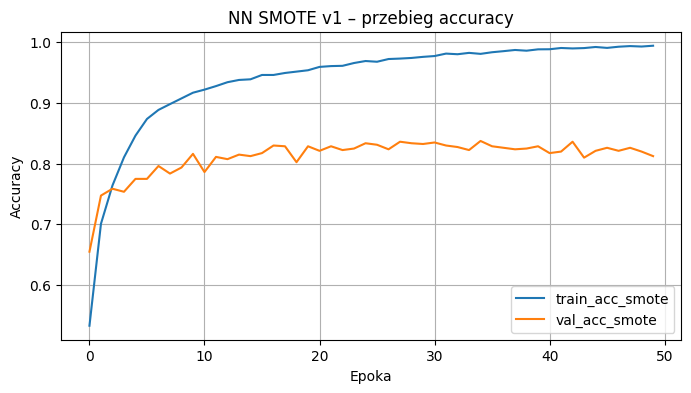

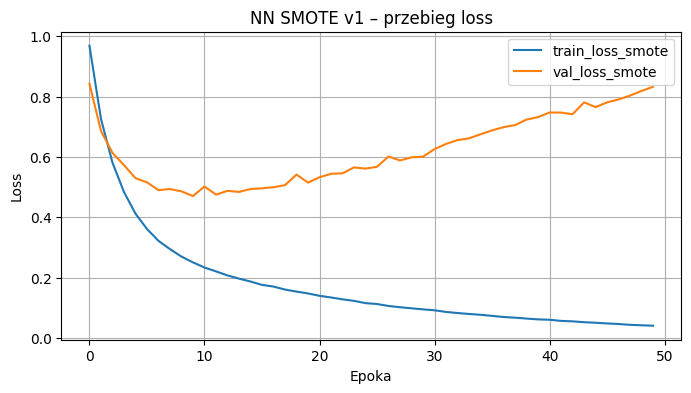

In [22]:
import matplotlib.pyplot as plt                          # biblioteka do wykresów
import pandas as pd                                      # praca z tabelami

history_df_nn_smote_v1 = pd.DataFrame(history_nn_smote_v1.history)  # historia treningu do DataFrame
print(history_df_nn_smote_v1.tail())                                  # podgląd ostatnich epok

plt.figure(figsize=(8, 4))                                            # pierwszy wykres – accuracy
plt.plot(history_df_nn_smote_v1['accuracy'], label='train_acc_smote')     # accuracy train
plt.plot(history_df_nn_smote_v1['val_accuracy'], label='val_acc_smote')   # accuracy val
plt.xlabel('Epoka')                                                   # opis osi X
plt.ylabel('Accuracy')                                                # opis osi Y
plt.title('NN SMOTE v1 – przebieg accuracy')                          # tytuł wykresu
plt.legend()                                                          # legenda
plt.grid(True)                                                        # siatka
plt.show()                                                            # pokazujemy wykres

plt.figure(figsize=(8, 4))                                            # drugi wykres – loss
plt.plot(history_df_nn_smote_v1['loss'], label='train_loss_smote')        # loss train
plt.plot(history_df_nn_smote_v1['val_loss'], label='val_loss_smote')      # loss val
plt.xlabel('Epoka')                                                   # opis osi X
plt.ylabel('Loss')                                                    # opis osi Y
plt.title('NN SMOTE v1 – przebieg loss')                             # tytuł wykresu
plt.legend()                                                          # legenda
plt.grid(True)                                                        # siatka
plt.show()                                                            # pokazujemy wykres


In [23]:
from sklearn.metrics import classification_report, confusion_matrix   # metryki klasyfikacji

test_loss_nn_smote_v1, test_acc_nn_smote_v1 = model_nn_smote_v1.evaluate(  # ocena na teście
    X_test_std, y_test, verbose=0                                   # cechy i etykiety zbioru testowego
)

print(f"Test loss (NN SMOTE v1): {test_loss_nn_smote_v1:.4f}")      # wypisujemy stratę na teście
print(f"Test accuracy (NN SMOTE v1): {test_acc_nn_smote_v1:.4f}")   # wypisujemy accuracy (pomocniczo)

y_test_proba_nn_smote_v1 = model_nn_smote_v1.predict(X_test_std)    # prawdopodobieństwa klas na teście
y_test_pred_nn_smote_v1 = np.argmax(y_test_proba_nn_smote_v1, axis=1)  # klasy z max prawdopodobieństwem

print("\nClassification report – NN SMOTE v1:")                     # nagłówek raportu
print(classification_report(y_test, y_test_pred_nn_smote_v1))       # precision/recall/F1 dla klas

cm_nn_smote_v1 = confusion_matrix(y_test, y_test_pred_nn_smote_v1)  # liczymy macierz konfuzji
print("Confusion matrix – NN SMOTE v1:")                            # nagłówek macierzy
print(cm_nn_smote_v1)                                               # wypisujemy macierz


Test loss (NN SMOTE v1): 0.8262
Test accuracy (NN SMOTE v1): 0.8200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Classification report – NN SMOTE v1:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       698
           1       0.71      0.72      0.72       201
           2       0.51      0.58      0.54       101

    accuracy                           0.82      1000
   macro avg       0.71      0.73      0.72      1000
weighted avg       0.83      0.82      0.82      1000

Confusion matrix – NN SMOTE v1:
[[616  44  38]
 [ 37 145  19]
 [ 28  14  59]]


In [24]:
import plotly.express as px                                         # biblioteka do interaktywnych wykresów
import pandas as pd                                                 # DataFrame dla macierzy

cm_df_nn_smote_v1 = pd.DataFrame(                                   # DataFrame z macierzy konfuzji
    cm_nn_smote_v1,                                                 # surowa macierz
    index=[f"Actual {c}" for c in np.unique(y_test)],               # etykiety rzeczywiste
    columns=[f"Pred {c}" for c in np.unique(y_test)]                # etykiety przewidziane
)

fig_cm_nn_smote_v1 = px.imshow(                                     # tworzymy heatmapę
    cm_df_nn_smote_v1,                                              # dane
    text_auto=True,                                                 # liczby w komórkach
    color_continuous_scale="Blues",                                 # skala kolorów
    title="Confusion Matrix – NN SMOTE v1 (Plotly)"                 # tytuł wykresu
)

fig_cm_nn_smote_v1.update_layout(                                   # dopracowanie wyglądu
    xaxis_title="Predykcja modelu",                                 # podpis osi X
    yaxis_title="Rzeczywista klasa",                                # podpis osi Y
    font=dict(size=14)                                              # większa czcionka
)

fig_cm_nn_smote_v1.show()                                           # pokazujemy interaktywny wykres


#Ważenie klas

policzenie class weights

In [25]:
from collections import Counter                         # do podglądu liczności klas
from sklearn.utils.class_weight import compute_class_weight  # do liczenia wag klas
import numpy as np                                      # operacje numeryczne

print("Rozkład klas w y_train:", Counter(y_train))      # pokazujemy ile jest próbek każdej klasy

classes = np.unique(y_train)                            # unikalne etykiety klas
class_weights_vals = compute_class_weight(              # liczymy wagi tak, aby zbalansować wpływ klas
    class_weight='balanced',                            # tryb 'balanced' – standardowy wzór
    classes=classes,                                    # lista klas
    y=y_train                                           # etykiety treningowe
)

class_weights_v1 = {cls: w for cls, w in zip(classes, class_weights_vals)}  # zamieniamy na słownik

print("Wagi klas (class_weights_v1):", class_weights_v1) # podgląd wag dla każdej klasy


Rozkład klas w y_train: Counter({np.int64(0): 2234, np.int64(1): 644, np.int64(2): 322})
Wagi klas (class_weights_v1): {np.int64(0): np.float64(0.4774694121157863), np.int64(1): np.float64(1.6563146997929608), np.int64(2): np.float64(3.3126293995859215)}


In [26]:
import tensorflow as tf                                 # główna biblioteka ML
from tensorflow.keras import layers, models             # warstwy i modele

INPUT_DIM_CW = X_train_std.shape[1]                     # liczba cech wejściowych
N_CLASSES_CW = len(np.unique(y_train))                  # liczba klas (3)
EPOCHS_NN_CW_V1 = 50                                    # liczba epok
BATCH_SIZE_NN_CW_V1 = 64                                # rozmiar batcha

model_nn_cw_v1 = models.Sequential()                    # inicjujemy model sekwencyjny
model_nn_cw_v1.add(layers.Input(shape=(INPUT_DIM_CW,))) # warstwa wejściowa
model_nn_cw_v1.add(layers.Dense(64, activation='relu', name='dense_64_cw'))  # 1. warstwa ukryta
model_nn_cw_v1.add(layers.Dense(32, activation='relu', name='dense_32_cw'))  # 2. warstwa ukryta
model_nn_cw_v1.add(layers.Dense(N_CLASSES_CW, activation='softmax', name='output_softmax_cw'))  # wyjście

model_nn_cw_v1.compile(                                 # kompilujemy model
    optimizer='adam',                                   # optymalizator Adam
    loss='sparse_categorical_crossentropy',             # funkcja straty dla etykiet 0..K-1
    metrics=['accuracy']                                # accuracy – metryka pomocnicza
)

history_nn_cw_v1 = model_nn_cw_v1.fit(                  # trenujemy model z wagami klas
    X_train_std,                                        # oryginalne wystandaryzowane dane train
    y_train,                                            # oryginalne etykiety (niezbalansowane)
    validation_data=(X_val_std, y_val),                 # walidacja na oryginalnym zbiorze val
    epochs=EPOCHS_NN_CW_V1,                             # liczba epok
    batch_size=BATCH_SIZE_NN_CW_V1,                     # rozmiar batcha
    class_weight=class_weights_v1,                      # >>> tu wchodzą wagi klas <<<
    verbose=1                                           # logi z treningu
)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3563 - loss: 1.1017 - val_accuracy: 0.5038 - val_loss: 1.0273
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5052 - loss: 0.9802 - val_accuracy: 0.6375 - val_loss: 0.9003
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6232 - loss: 0.8787 - val_accuracy: 0.6475 - val_loss: 0.8504
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6622 - loss: 0.8098 - val_accuracy: 0.6988 - val_loss: 0.7585
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7145 - loss: 0.7433 - val_accuracy: 0.7163 - val_loss: 0.7133
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7302 - loss: 0.6942 - val_accuracy: 0.7088 - val_loss: 0.6995
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7464 - loss: 0.6535 - val_accuracy: 0.7450 - val_loss: 0.6414
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7656 - loss: 0.6068 - val_accuracy: 0.7462 - val_loss

    accuracy      loss  val_accuracy  val_loss
45  0.929062  0.198210       0.80625  0.509780
46  0.929062  0.195999       0.80125  0.523019
47  0.922813  0.192947       0.80750  0.520510
48  0.929688  0.189935       0.79750  0.537680
49  0.935000  0.183254       0.80500  0.518009


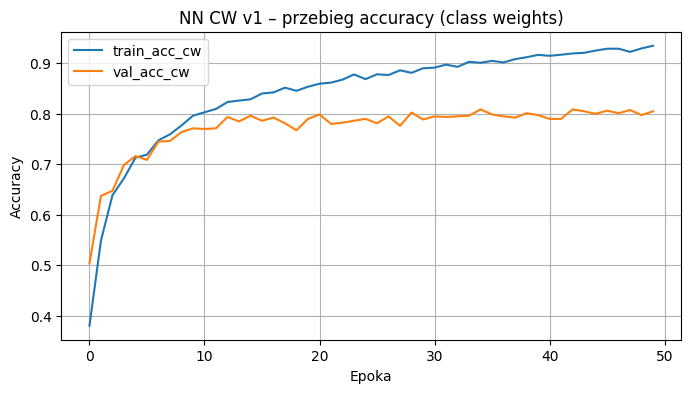

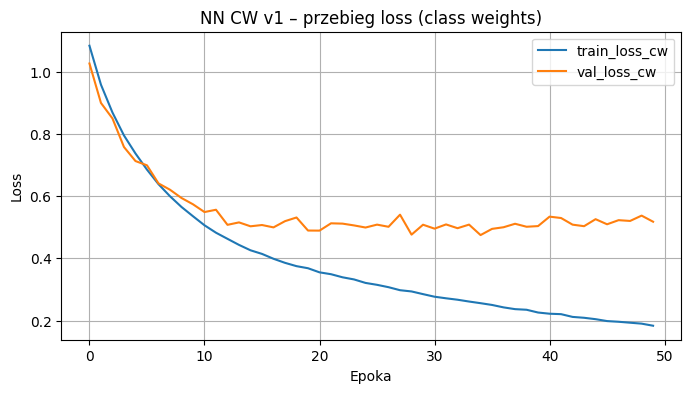

In [27]:
import matplotlib.pyplot as plt                         # wykresy
import pandas as pd                                     # wygodna praca z history

history_df_nn_cw_v1 = pd.DataFrame(history_nn_cw_v1.history)  # historia treningu → DataFrame
print(history_df_nn_cw_v1.tail())                               # podgląd końcówki

plt.figure(figsize=(8, 4))
plt.plot(history_df_nn_cw_v1['accuracy'], label='train_acc_cw')     # accuracy train
plt.plot(history_df_nn_cw_v1['val_accuracy'], label='val_acc_cw')   # accuracy val
plt.xlabel('Epoka')
plt.ylabel('Accuracy')
plt.title('NN CW v1 – przebieg accuracy (class weights)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(history_df_nn_cw_v1['loss'], label='train_loss_cw')        # loss train
plt.plot(history_df_nn_cw_v1['val_loss'], label='val_loss_cw')      # loss val
plt.xlabel('Epoka')
plt.ylabel('Loss')
plt.title('NN CW v1 – przebieg loss (class weights)')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
from sklearn.metrics import classification_report, confusion_matrix   # metryki klasyfikacji

test_loss_nn_cw_v1, test_acc_nn_cw_v1 = model_nn_cw_v1.evaluate(     # ocena na zbiorze testowym
    X_test_std, y_test, verbose=0
)

print(f"Test loss (NN CW v1): {test_loss_nn_cw_v1:.4f}")
print(f"Test accuracy (NN CW v1): {test_acc_nn_cw_v1:.4f}")

y_test_proba_nn_cw_v1 = model_nn_cw_v1.predict(X_test_std)           # prawdopodobieństwa klas
y_test_pred_nn_cw_v1 = np.argmax(y_test_proba_nn_cw_v1, axis=1)      # klasy z max prawdopodobieństwem

print("\nClassification report – NN CW v1 (class weights):")
print(classification_report(y_test, y_test_pred_nn_cw_v1))           # precision/recall/F1 dla klas

cm_nn_cw_v1 = confusion_matrix(y_test, y_test_pred_nn_cw_v1)         # macierz konfuzji
print("Confusion matrix – NN CW v1:")
print(cm_nn_cw_v1)


Test loss (NN CW v1): 0.4680
Test accuracy (NN CW v1): 0.8360
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Classification report – NN CW v1 (class weights):
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       698
           1       0.69      0.77      0.72       201
           2       0.67      0.61      0.64       101

    accuracy                           0.84      1000
   macro avg       0.75      0.76      0.75      1000
weighted avg       0.84      0.84      0.84      1000

Confusion matrix – NN CW v1:
[[620  57  21]
 [ 37 154  10]
 [ 26  13  62]]


In [29]:
import plotly.express as px
import pandas as pd

cm_df_nn_cw_v1 = pd.DataFrame(
    cm_nn_cw_v1,
    index=[f"Actual {c}" for c in np.unique(y_test)],
    columns=[f"Pred {c}" for c in np.unique(y_test)]
)

fig_cm_nn_cw_v1 = px.imshow(
    cm_df_nn_cw_v1,
    text_auto=True,
    color_continuous_scale="Blues",
    title="Confusion Matrix – NN CW v1 (class weights, Plotly)"
)

fig_cm_nn_cw_v1.update_layout(
    xaxis_title="Predykcja modelu",
    yaxis_title="Rzeczywista klasa",
    font=dict(size=14)
)

fig_cm_nn_cw_v1.show()


#Cost sensitive learning

definicja kosztów klas i sample_weight

In [33]:
from collections import Counter                              # do podejrzenia rozkładu klas
import numpy as np                                           # obliczenia numeryczne

print("Rozkład klas w y_train:", Counter(y_train))           # wypisujemy ile próbek ma każda klasa

cost_per_class_v1 = {                                        # słownik kosztów dla każdej klasy
    0: 1.0,                                                  # najliczniejsza klasa – najmniejszy koszt
    1: 2.0,                                                  # klasa średnio liczna – koszt pośredni
    2: 3.0                                                   # klasa najrzadsza – najwyższy koszt błędu
}

sample_weights_cost_v1 = np.array([                          # tworzymy tablicę wag próbek
    cost_per_class_v1[y_i]                                   # bierzemy koszt odpowiadający klasie y_i
    for y_i in y_train                                       # iterujemy po wszystkich próbkach zbioru train
], dtype=float)                                              # zapisujemy jako typ float

print("Przykładowe wagi próbek:", sample_weights_cost_v1[:10])  # podglądamy pierwsze 10 wag
print("Unikalne wagi:", np.unique(sample_weights_cost_v1))       # podglądamy jakie wagi występują


Rozkład klas w y_train: Counter({np.int64(0): 2234, np.int64(1): 644, np.int64(2): 322})
Przykładowe wagi próbek: [2. 2. 1. 1. 1. 2. 1. 1. 3. 2.]
Unikalne wagi: [1. 2. 3.]


In [34]:
import tensorflow as tf                                      # główna biblioteka ML
from tensorflow.keras import layers, models                  # warstwy i modele Keras

INPUT_DIM_COST = X_train_std.shape[1]                        # liczba cech wejściowych
N_CLASSES_COST = len(np.unique(y_train))                     # liczba klas (3)
EPOCHS_NN_COST_V1 = 50                                       # liczba epok uczenia
BATCH_SIZE_NN_COST_V1 = 64                                   # rozmiar batcha

model_nn_cost_v1 = models.Sequential()                       # inicjalizujemy model sekwencyjny
model_nn_cost_v1.add(layers.Input(shape=(INPUT_DIM_COST,)))  # warstwa wejściowa o wymiarze liczby cech
model_nn_cost_v1.add(layers.Dense(64, activation='relu', name='dense_64_cost'))   # 1. warstwa ukryta 64 neurony
model_nn_cost_v1.add(layers.Dense(32, activation='relu', name='dense_32_cost'))   # 2. warstwa ukryta 32 neurony
model_nn_cost_v1.add(layers.Dense(N_CLASSES_COST, activation='softmax', name='output_softmax_cost'))  # wyjście softmax

model_nn_cost_v1.compile(                                    # kompilujemy model
    optimizer='adam',                                        # optymalizator Adam
    loss='sparse_categorical_crossentropy',                  # funkcja straty dla etykiet 0..K-1
    metrics=['accuracy']                                     # accuracy jako metryka pomocnicza
)

history_nn_cost_v1 = model_nn_cost_v1.fit(                   # trenujemy model z wagami próbek
    X_train_std,                                             # cechy zbioru treningowego
    y_train,                                                 # etykiety klas zbioru treningowego
    sample_weight=sample_weights_cost_v1,                    # >>> wagi próbek (koszty) <<<
    validation_data=(X_val_std, y_val),                      # walidacja na oryginalnym zbiorze val
    epochs=EPOCHS_NN_COST_V1,                                # liczba epok
    batch_size=BATCH_SIZE_NN_COST_V1,                        # rozmiar batcha
    verbose=1                                                # logowanie przebiegu treningu
)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.5015 - loss: 1.5098 - val_accuracy: 0.7462 - val_loss: 0.8061
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7491 - loss: 1.2352 - val_accuracy: 0.7650 - val_loss: 0.7007
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7538 - loss: 1.1357 - val_accuracy: 0.7713 - val_loss: 0.6361
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7794 - loss: 1.0278 - val_accuracy: 0.7725 - val_loss: 0.5941
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7935 - loss: 0.9379 - val_accuracy: 0.7738 - val_loss: 0.5893
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8037 - loss: 0.8911 - val_accuracy: 0.7837 - val_loss: 0.5502
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8156 - loss: 0.8340 - val_accuracy: 0.8062 - val_loss: 0.5115
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8220 - loss: 0.8093 - val_accuracy: 0.8087 - va

    accuracy      loss  val_accuracy  val_loss
45  0.950625  0.254149       0.84125  0.457105
46  0.955000  0.250023       0.84000  0.467649
47  0.957187  0.242349       0.84375  0.463094
48  0.955000  0.241179       0.84250  0.462584
49  0.959687  0.233857       0.84000  0.472446


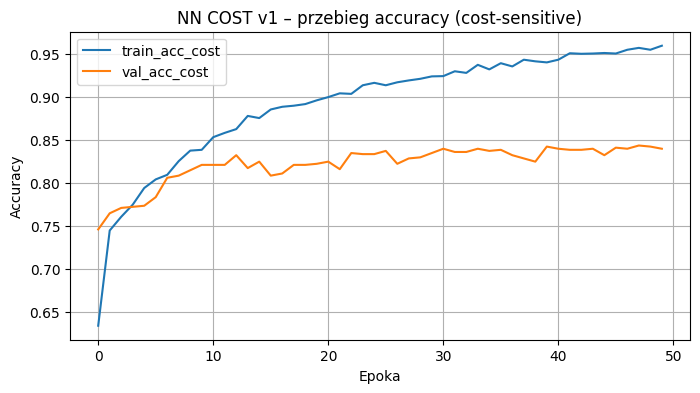

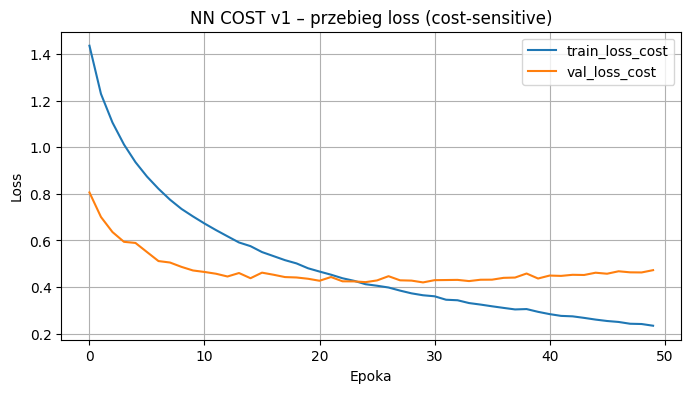

In [35]:
import matplotlib.pyplot as plt                              # biblioteka do wykresów
import pandas as pd                                          # wygodna praca z historią treningu

history_df_nn_cost_v1 = pd.DataFrame(history_nn_cost_v1.history)  # konwersja historii do DataFrame
print(history_df_nn_cost_v1.tail())                               # podglądamy ostatnie epoki

plt.figure(figsize=(8, 4))                                      # tworzymy wykres accuracy
plt.plot(history_df_nn_cost_v1['accuracy'], label='train_acc_cost')     # accuracy na treningu
plt.plot(history_df_nn_cost_v1['val_accuracy'], label='val_acc_cost')   # accuracy na walidacji
plt.xlabel('Epoka')                                             # opis osi X
plt.ylabel('Accuracy')                                          # opis osi Y
plt.title('NN COST v1 – przebieg accuracy (cost-sensitive)')    # tytuł wykresu
plt.legend()                                                    # legenda
plt.grid(True)                                                  # siatka
plt.show()                                                      # wyświetlamy wykres

plt.figure(figsize=(8, 4))                                      # drugi wykres – loss
plt.plot(history_df_nn_cost_v1['loss'], label='train_loss_cost')       # strata na treningu
plt.plot(history_df_nn_cost_v1['val_loss'], label='val_loss_cost')     # strata na walidacji
plt.xlabel('Epoka')                                             # opis osi X
plt.ylabel('Loss')                                              # opis osi Y
plt.title('NN COST v1 – przebieg loss (cost-sensitive)')        # tytuł wykresu
plt.legend()                                                    # legenda
plt.grid(True)                                                  # siatka
plt.show()                                                      # wyświetlamy wykres


In [36]:
from sklearn.metrics import classification_report, confusion_matrix   # metryki klasyfikacji

test_loss_nn_cost_v1, test_acc_nn_cost_v1 = model_nn_cost_v1.evaluate(  # ocena na zbiorze testowym
    X_test_std,                                                        # cechy testowe
    y_test,                                                            # etykiety testowe
    verbose=0                                                          # bez dodatkowych logów
)

print(f"Test loss (NN COST v1): {test_loss_nn_cost_v1:.4f}")           # wypisujemy stratę
print(f"Test accuracy (NN COST v1): {test_acc_nn_cost_v1:.4f}")        # wypisujemy accuracy (pomocniczo)

y_test_proba_nn_cost_v1 = model_nn_cost_v1.predict(X_test_std)        # przewidywane prawdopodobieństwa klas
y_test_pred_nn_cost_v1 = np.argmax(y_test_proba_nn_cost_v1, axis=1)   # wybieramy klasy z największym prawdopodobieństwem

print("\nClassification report – NN COST v1 (cost-sensitive):")        # nagłówek raportu
print(classification_report(y_test, y_test_pred_nn_cost_v1))          # precision/recall/F1 dla wszystkich klas

cm_nn_cost_v1 = confusion_matrix(y_test, y_test_pred_nn_cost_v1)      # liczymy macierz konfuzji
print("Confusion matrix – NN COST v1:")                               # nagłówek macierzy
print(cm_nn_cost_v1)                                                  # wypisujemy macierz


Test loss (NN COST v1): 0.4697
Test accuracy (NN COST v1): 0.8370
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification report – NN COST v1 (cost-sensitive):
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       698
           1       0.73      0.72      0.72       201
           2       0.62      0.58      0.60       101

    accuracy                           0.84      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.83      0.84      0.84      1000

Confusion matrix – NN COST v1:
[[634  41  23]
 [ 44 144  13]
 [ 29  13  59]]


In [37]:
import plotly.express as px                                          # biblioteka do interaktywnych wykresów
import pandas as pd                                                  # DataFrame dla macierzy

cm_df_nn_cost_v1 = pd.DataFrame(                                     # tworzymy DataFrame z macierzy konfuzji
    cm_nn_cost_v1,                                                   # surowa macierz
    index=[f"Actual {c}" for c in np.unique(y_test)],                # etykiety wierszy – klasy rzeczywiste
    columns=[f"Pred {c}" for c in np.unique(y_test)]                 # etykiety kolumn – klasy przewidziane
)

fig_cm_nn_cost_v1 = px.imshow(                                       # tworzymy heatmapę
    cm_df_nn_cost_v1,                                                # dane
    text_auto=True,                                                  # liczby w komórkach
    color_continuous_scale="Blues",                                  # skala kolorów
    title="Confusion Matrix – NN COST v1 (cost-sensitive, Plotly)"   # tytuł wykresu
)

fig_cm_nn_cost_v1.update_layout(                                     # dopracowujemy wygląd
    xaxis_title="Predykcja modelu",                                  # podpis osi X
    yaxis_title="Rzeczywista klasa",                                 # podpis osi Y
    font=dict(size=14)                                               # rozmiar czcionki
)

fig_cm_nn_cost_v1.show()                                             # wyświetlamy interaktywny wykres


#One class learing

przygotowanie danych do one-class (binarne etykiety + zbiór „normalny”)

In [38]:
import numpy as np                           # obliczenia numeryczne
from collections import Counter              # podgląd rozkładu klas

# --- wybieramy klasę traktowaną jako anomalia ---
ANOMALY_CLASS_1C_V1 = 2                      # klasa 2 będzie traktowana jako "anomalia"

print("Rozkład klas w y_train:", Counter(y_train))   # kontrolnie wypisujemy rozkład klas w zbiorze train

# --- tworzymy binarne etykiety: 0 = normalne, 1 = anomalia ---
y_train_1c = (y_train == ANOMALY_CLASS_1C_V1).astype(int)   # w train: 1 jeśli klasa 2, inaczej 0
y_val_1c   = (y_val   == ANOMALY_CLASS_1C_V1).astype(int)   # w val
y_test_1c  = (y_test  == ANOMALY_CLASS_1C_V1).astype(int)   # w test

print("Rozkład binarny y_train_1c (0=normal,1=anomalia):", Counter(y_train_1c))  # podgląd

# --- dane do uczenia one-class: tylko normalne próbki (etykieta 0) ---
mask_normal_train = (y_train_1c == 0)        # maska próbek normalnych w zbiorze treningowym
X_train_std_1c_norm = X_train_std[mask_normal_train]   # cechy tylko dla normalnych próbek

print("Kształt X_train_std_1c_norm:", X_train_std_1c_norm.shape)  # ile danych normalnych do uczenia


Rozkład klas w y_train: Counter({np.int64(0): 2234, np.int64(1): 644, np.int64(2): 322})
Rozkład binarny y_train_1c (0=normal,1=anomalia): Counter({np.int64(0): 2878, np.int64(1): 322})
Kształt X_train_std_1c_norm: (2878, 20)


In [39]:
from sklearn.svm import OneClassSVM          # model one-class oparty na SVM

# --- konfiguracja modelu one-class ---
model_1c_v1 = OneClassSVM(                   # tworzymy model one-class SVM
    kernel='rbf',                            # jądro RBF (nieliniowe)
    gamma='auto',                            # gamma dobrana automatycznie
    nu=0.05                                  # odsetek oczekiwanych anomalii (hiperparametr)
)

# --- uczenie modelu na danych normalnych ---
model_1c_v1.fit(X_train_std_1c_norm)         # uczymy model tylko na próbkach normalnych (bez anomalii)

print("Model one-class wytrenowany.")        # komunikat kontrolny


Model one-class wytrenowany.


In [40]:
from sklearn.metrics import classification_report, confusion_matrix   # metryki klasyfikacji

# --- predykcja na zbiorze testowym ---
y_test_pred_raw_1c_v1 = model_1c_v1.predict(X_test_std)   # SVM zwraca +1 dla normalnych, -1 dla anomalii

# --- mapowanie predykcji SVM na etykiety 0/1 ---
y_test_pred_1c_v1 = (y_test_pred_raw_1c_v1 == -1).astype(int)   # -1 → 1 (anomalia), +1 → 0 (normalne)

# --- raport jakości ---
print("Classification report – One-Class SVM (NN_1C_V1):")
print(classification_report(y_test_1c, y_test_pred_1c_v1, target_names=['normal', 'anomaly']))

# --- macierz pomyłek ---
cm_1c_v1 = confusion_matrix(y_test_1c, y_test_pred_1c_v1)  # macierz konfuzji dla problemu binarnego
print("Confusion matrix – One-Class SVM (1C_V1):")
print(cm_1c_v1)


Classification report – One-Class SVM (NN_1C_V1):
              precision    recall  f1-score   support

      normal       0.91      0.93      0.92       899
     anomaly       0.21      0.16      0.18       101

    accuracy                           0.85      1000
   macro avg       0.56      0.54      0.55      1000
weighted avg       0.84      0.85      0.84      1000

Confusion matrix – One-Class SVM (1C_V1):
[[837  62]
 [ 85  16]]


In [41]:
import plotly.express as px              # interaktywne wykresy
import pandas as pd                      # DataFrame dla macierzy

# --- DataFrame z macierzy konfuzji ---
cm_df_1c_v1 = pd.DataFrame(
    cm_1c_v1,                            # macierz 2x2
    index=['Actual normal', 'Actual anomaly'],   # wiersze: klasy rzeczywiste
    columns=['Pred normal', 'Pred anomaly']      # kolumny: klasy przewidziane
)

# --- heatmapa Plotly ---
fig_cm_1c_v1 = px.imshow(
    cm_df_1c_v1,                         # dane
    text_auto=True,                      # wartości w komórkach
    color_continuous_scale="Blues",      # skala kolorów
    title="Confusion Matrix – One-Class SVM (1C_V1)"  # tytuł wykresu
)

fig_cm_1c_v1.update_layout(
    xaxis_title="Predykcja modelu",      # opis osi X
    yaxis_title="Rzeczywista klasa",     # opis osi Y
    font=dict(size=14)                   # wielkość fontu
)

fig_cm_1c_v1.show()                      # wyświetlamy interaktywny wykres
